# Human immune response to infectious disease

Unos modelos dinámicos.

In [1]:
# Para hacer experimentos numéricos importamos numpy
import numpy as np

# y biblioteca para plotear
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# cómputo simbólico con sympy
from sympy import *
# init_printing(use_latex='matplotlib')  # en emacs
init_printing()

## Linfocitos sin virus

In [2]:
Lamda1, Lamda2, mu1, mu2, a1, a2, b1, b2, E1, E2 = symbols('Lamda1 Lamda2 mu1 mu2 a1 a2 b1 b2 E1 E2')

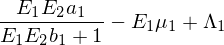

In [3]:
dE1 = Lamda1 - mu1 * E1 + (a1 * E1 * E2)/(1 + b1 * E1 * E2)
dE1

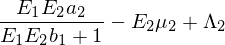

In [4]:
dE2 = Lamda2 - mu2 * E2 + (a2 * E1 * E2)/(1 + b1 * E1 * E2)
dE2

In [5]:
#solve((dE1, dE2), (E1, E2))
#e1 = solve(dE2, E1)[0]
#e2 = solve(dE1, E2)[0]
#e1, e2

In [6]:
#static_e1 = solve(e1.subs(E2, e2), E1)
#static_e1

In [7]:
#static_e2 = solve(e2.subs(E1, e1), E1)

In [8]:
#solve((dE1, dE2), (E1, E2), dict=True, manual=True) # exclude=[a1, a2, b1, b2, mu1, mu2])

In [9]:
def dE1(E1, E2):
    return Lamda1 - mu1 * E1 + (a1 * E1 * E2)/(1 + b1*E1*E2)

def dE2(E1, E2):
    return Lamda2 - mu2 * E2 + (a2 * E1 * E2)/(1 + b1*E1*E2)

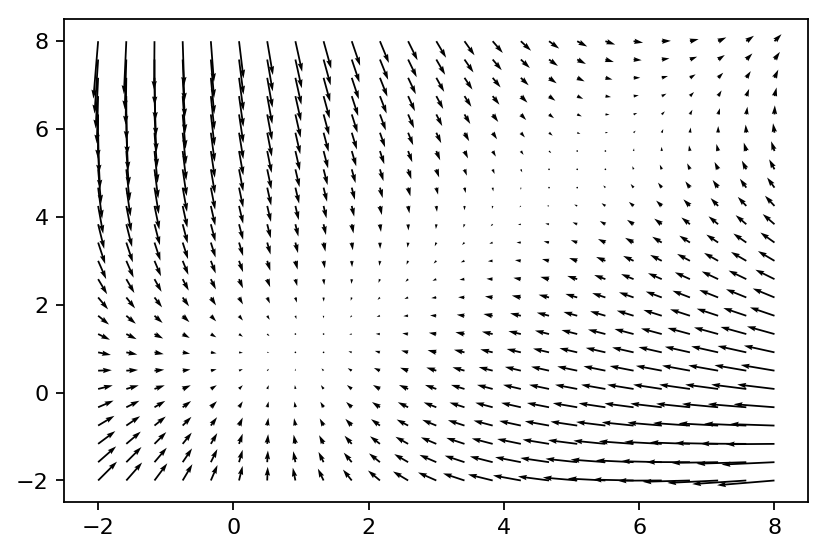

In [10]:
Lamda1 = 1
Lamda2 = 1
mu1 = 1.25
mu2 = 1.25
a1 = 0.252
a2 = 0.252
b1 = 0.008
b2 = 0.008

i, j = np.meshgrid(np.linspace(-2, 8, 25),
                   np.linspace(-2, 8, 25))

u = dE1(i, j)
v = dE2(i, j)

fig = plt.figure(dpi=160)
plt.quiver(i, j, u, v)

plt.show()

In [11]:
def step(x, y, dt, f, g):
    return (x + dt * f(x, y),
             y + dt * g(x, y))

def trayectoria(x0, y0, f, g, dt=0.01, steps=100):
    x = x0
    y = y0
    t = list()
    for n in range(steps):
        t.append((x, y))
        x, y = step(x, y, dt, f, g)
    return t

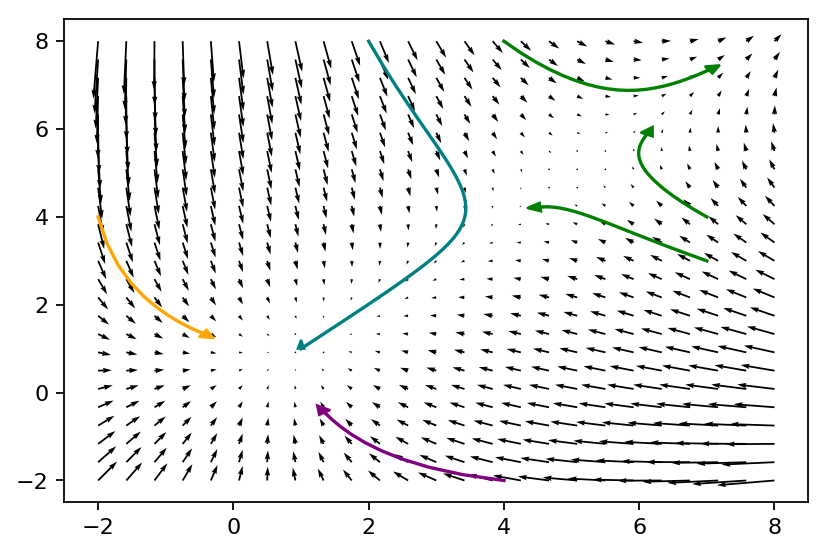

In [12]:
Lamda1 = 1
Lamda2 = 1
mu1 = 1.25
mu2 = 1.25
a1 = 0.252
a2 = 0.252
b1 = 0.008
b2 = 0.008

i, j = np.meshgrid(np.linspace(-2, 8, 25),
                   np.linspace(-2, 8, 25))

u = dE1(i, j)
v = dE2(i, j)

fig = plt.figure(dpi=160)
plt.quiver(i, j, u, v)


E10 = 2
E20 = 8
dt = 0.1
steps = 600
E1, E2 = zip(*[coord
               for coord in
               trayectoria(E10, E20, dE1, dE2, dt, steps)])
plt.plot(E1, E2, color='teal')
plt.arrow(E1[-2], E2[-2],
          E1[-1] - E1[-2], E2[-1] - E2[-2],
           color="teal", head_width=0.1, head_length=0.2)

E10 = -2
E20 = 4
dt = 0.1
steps = 10
E1, E2 = zip(*[coord
               for coord in
               trayectoria(E10, E20, dE1, dE2, dt, steps)])
plt.plot(E1, E2, color='orange')
plt.arrow(E1[-2], E2[-2],
          E1[-1] - E1[-2], E2[-1] - E2[-2],
           color="orange", head_width=0.2, head_length=0.2)


E10 = 4
E20 = -2
dt = 0.1
steps = 10
E1, E2 = zip(*[coord
               for coord in
               trayectoria(E10, E20, dE1, dE2, dt, steps)])
plt.plot(E1, E2, color='purple')
plt.arrow(E1[-2], E2[-2],
          E1[-1] - E1[-2], E2[-1] - E2[-2],
           color="purple", head_width=0.2, head_length=0.2)


E10 = 7
E20 = 4
dt = 0.1
steps = 20
E1, E2 = zip(*[coord
               for coord in
               trayectoria(E10, E20, dE1, dE2, dt, steps)])
plt.plot(E1, E2, color='green')
plt.arrow(E1[-2], E2[-2],
          E1[-1] - E1[-2], E2[-1] - E2[-2],
           color="green", head_width=0.2, head_length=0.2)


E10 = 7
E20 = 3
dt = 0.1
steps = 20
E1, E2 = zip(*[coord
               for coord in
               trayectoria(E10, E20, dE1, dE2, dt, steps)])
plt.plot(E1, E2, color='green')
plt.arrow(E1[-2], E2[-2],
          E1[-1] - E1[-2], E2[-1] - E2[-2],
           color="green", head_width=0.2, head_length=0.2)


E10 = 4
E20 = 8
dt = 0.1
steps = 20
E1, E2 = zip(*[coord
               for coord in
               trayectoria(E10, E20, dE1, dE2, dt, steps)])
plt.plot(E1, E2, color='green')
plt.arrow(E1[-2], E2[-2],
          E1[-1] - E1[-2], E2[-1] - E2[-2],
           color="green", head_width=0.2, head_length=0.2)

plt.show()